#Decision Tree, Random Forest, Naive Bayes, Support Vector Machine, and Rule-Based Classifier for customer churn prediciton

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, auc, confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
df = pd.read_csv('shopzada_churn.csv')
df.head(10)

Customer_ID  Age Gender  Annual_Income  Total_Spend  Years_as_Customer  \
0            1   62  Other          45.15      5892.58                  5   
1            2   65   Male          79.51      9025.47                 13   
2            3   18   Male          29.19       618.83                 13   
3            4   21  Other          79.63      9110.30                  3   
4            5   21  Other          77.66      5390.88                 15   
5            6   57   Male         190.43       255.19                 19   
6            7   27   Male         172.13      3512.55                  3   
7            8   37  Other          88.90      7270.90                  4   
8            9   39  Other          24.46      4935.49                  1   
9           10   68  Other         169.59      9803.57                 17   

   Num_of_Purchases  Average_Transaction_Amount  Num_of_Returns  \
0                22                      453.80               2   
1                77                       22.90               2   
2                71                       50.53               5   
3                33                      411.83               5   
4                43                      101.19               3   
5                85                      417.78               5   
6                77                      316.18               0   
7                87                       63.61               3   
8                21                      173.80               9   
9                34                      481.18               6   

   Num_of_Support_Contacts  Satisfaction_Score  Last_Purchase_Days_Ago  \
0                        0                   3                     129   
1                        2                   3                     227   
2                        2                   2                     283   
3                        3                   5                     226   
4                        0                   5                     242   
5                        1                   4                     130   
6                        3                   1                      61   
7                        4                   3                     224   
8                        2                   4                     126   
9                        1                   2                     171   

   Email_Opt_In Promotion_Response  Target_Churn  
0          True          Responded          True  
1         False          Responded         False  
2         False          Responded          True  
3          True            Ignored          True  
4         False       Unsubscribed         False  
5         False       Unsubscribed         False  
6          True       Unsubscribed         False  
7         False            Ignored         False  
8          True          Responded          True  
9          True       Unsubscribed         False

In [ ]:
# Pre-processing and relabeling the nominal values of "Gender" and "Promotion_Response" to numerical labels via one hot encoding
# Creates new columns for each gender and adds a binary value 1 if they are male, female, or other; same for Promotion_Response

df['Gender'] = df['Gender'].str.lower()
df['Promotion_Response'] = df['Promotion_Response'].str.lower()
df = pd.get_dummies(df, columns=["Gender"],  prefix="Gender")
df = pd.get_dummies(df, columns=["Promotion_Response"],  prefix="Response")

In [ ]:
# Checking if a column has a null value
df.isnull().sum()

Customer_ID                   0
Age                           0
Annual_Income                 0
Total_Spend                   0
Years_as_Customer             0
Num_of_Purchases              0
Average_Transaction_Amount    0
Num_of_Returns                0
Num_of_Support_Contacts       0
Satisfaction_Score            0
Last_Purchase_Days_Ago        0
Email_Opt_In                  0
Target_Churn                  0
Gender_female                 0
Gender_male                   0
Gender_other                  0
Response_ignored              0
Response_responded            0
Response_unsubscribed         0
dtype: int64

In [ ]:
y = df['Target_Churn']
x = df.drop(['Customer_ID', 'Target_Churn'], axis=1)

In [ ]:
from functools import total_ordering
x.head(5)

Age  Annual_Income  Total_Spend  Years_as_Customer  Num_of_Purchases  \
0   62          45.15      5892.58                  5                22   
1   65          79.51      9025.47                 13                77   
2   18          29.19       618.83                 13                71   
3   21          79.63      9110.30                  3                33   
4   21          77.66      5390.88                 15                43   

   Average_Transaction_Amount  Num_of_Returns  Num_of_Support_Contacts  \
0                      453.80               2                        0   
1                       22.90               2                        2   
2                       50.53               5                        2   
3                      411.83               5                        3   
4                      101.19               3                        0   

   Satisfaction_Score  Last_Purchase_Days_Ago  Email_Opt_In  Gender_female  \
0                   3                     129          True              0   
1                   3                     227         False              0   
2                   2                     283         False              0   
3                   5                     226          True              0   
4                   5                     242         False              0   

   Gender_male  Gender_other  Response_ignored  Response_responded  \
0            0             1                 0                   1   
1            1             0                 0                   1   
2            1             0                 0                   1   
3            0             1                 1                   0   
4            0             1                 0                   0   

   Response_unsubscribed  
0                      0  
1                      0  
2                      0  
3                      0  
4                      1

In [ ]:
x.shape

(1000, 17)

In [ ]:
# Splits the training data to 70%
# 30% left to allocate for unseen and testing data
x_train, x_remain, y_train, y_remain = train_test_split(x, y, test_size = 0.3,
                                                        random_state = 42)

# 20% testing and 10% unseen; 0.33 allocates roughly 20% for testing
x_test, x_unseen, y_test, y_unseen = train_test_split(x_remain, y_remain,
                                                      test_size = 0.333333333333,
                                                      random_state = 42)

In [ ]:
print("x shapes:\n")
x_train.shape, x_test.shape, x_unseen.shape

x shapes:



((700, 17), (200, 17), (100, 17))

In [ ]:
print("y shapes:\n")
y_train.shape, y_test.shape, y_unseen.shape

y shapes:



((700,), (200,), (100,))

#DECISION TREE

In [ ]:
# Define and Train the Model
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)
y_pred_unseen = dtc.predict(x_unseen)

In [ ]:
# Calculate Metrics
matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_pred)

accuracy_unseen = accuracy_score(y_unseen, y_pred_unseen)
precision_unseen = precision_score(y_unseen, y_pred_unseen, average='binary')
recall_unseen = recall_score(y_unseen, y_pred_unseen, average='binary')
roc_auc_unseen = roc_auc_score(y_unseen, y_pred_unseen)

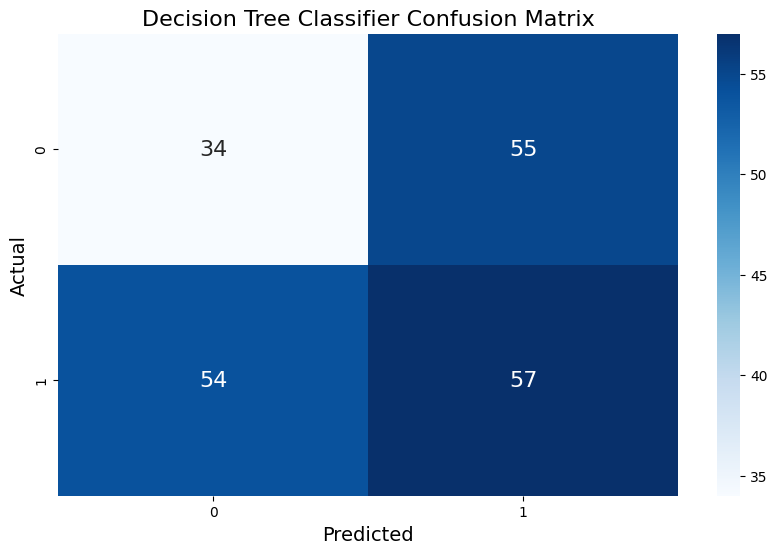

Test Accuracy: 0.455
Test Precision: 0.5089285714285714
Test Recall: 0.5135135135135135
Test ROC-AUC: 0.447767992711813 

Validation Accuracy: 0.54
Validation Precision: 0.58
Validation Recall: 0.5370370370370371
Validation ROC-AUC: 0.5402576489533012


In [ ]:
# Display Metrics
plt.figure(figsize=(10, 6))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 16})

plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Decision Tree Classifier Confusion Matrix', fontsize=16)
plt.show()

print('Test Accuracy:', accuracy)
print('Test Precision:', precision)
print('Test Recall:', recall)
print('Test ROC-AUC:', roc_auc, '\n')

print('Validation Accuracy:', accuracy_unseen)
print('Validation Precision:', precision_unseen)
print('Validation Recall:', recall_unseen)
print('Validation ROC-AUC:', roc_auc_unseen)

In [ ]:
# K-Fold Cross Validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(dtc, x, y, cv=k_fold, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", round(scores.mean(), 10))
print("Standard Deviation of Accuracy:", scores.std())

Cross-Validation Scores: [0.55  0.555 0.505 0.515 0.48 ]
Mean Accuracy: 0.521
Standard Deviation of Accuracy: 0.02817800560721077


#RULE-BASED CLASSIFIER

In [ ]:
# Define the Model
class RuleBasedClassifier:
  def __init__(self, rules, default_class):
    self.rules = rules
    self.default_class = default_class

  def predict(self, x):
    y_pred = []

    for index, row in x.iterrows():
        predicted_class = self.default_class
        for condition in self.rules:
            if condition(row):
                predicted_class = self.default_class
                break
            predicted_class = True
        y_pred.append(predicted_class)
    return y_pred

In [ ]:
# Test the Model
rules = [
  lambda x: x['Average_Transaction_Amount'] < 90 and x['Num_of_Purchases'] < 5,
  lambda x: x['Total_Spend'] < 2000 and x['Years_as_Customer'] < 3,
  lambda x: x['Satisfaction_Score'] <= 3
]

rbc = RuleBasedClassifier(rules=rules, default_class=False)

y_pred = rbc.predict(x_test)
y_pred_unseen = rbc.predict(x_unseen)

In [ ]:
# Calculate the Metrix

matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_pred)

accuracy_unseen = accuracy_score(y_unseen, y_pred_unseen)
precision_unseen = precision_score(y_unseen, y_pred_unseen, average='binary')
recall_unseen = recall_score(y_unseen, y_pred_unseen, average='binary')
roc_auc_unseen = roc_auc_score(y_unseen, y_pred_unseen)

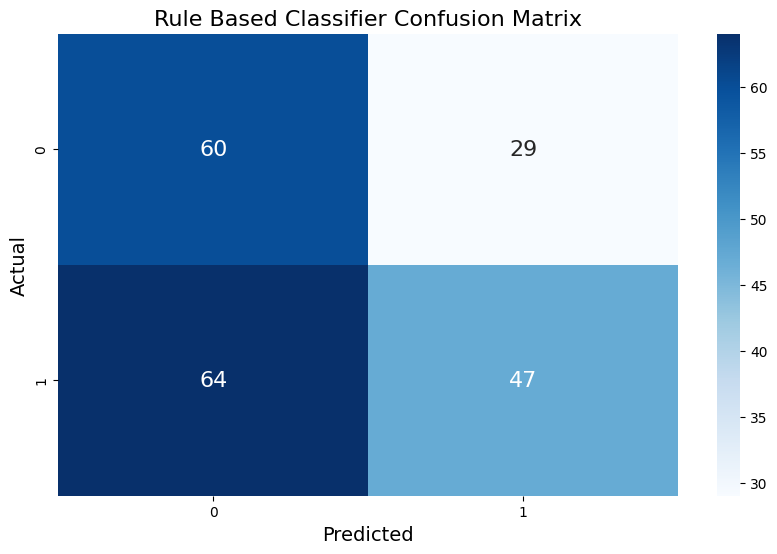

Test Accuracy: 0.535
Test Precision: 0.618421052631579
Test Recall: 0.42342342342342343
Test ROC-AUC: 0.548790363397105 

Validation Accuracy: 0.53
Validation Precision: 0.574468085106383
Validation Recall: 0.5
Validation ROC-AUC: 0.532608695652174


In [ ]:
# Display Metrics
plt.figure(figsize=(10, 6))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 16})

plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Rule Based Classifier Confusion Matrix', fontsize=16)
plt.show()

print('Test Accuracy:', accuracy)
print('Test Precision:', precision)
print('Test Recall:', recall)
print('Test ROC-AUC:', roc_auc, '\n')

print('Validation Accuracy:', accuracy_unseen)
print('Validation Precision:', precision_unseen)
print('Validation Recall:', recall_unseen)
print('Validation ROC-AUC:', roc_auc_unseen)

#**SUPPORT VECTOR MACHINE** 👇⭐

In [ ]:
# Call the Support Vector Classifier (SVC)
#SVM_Mikita = SVC(gamma='auto')
SVM_Mikita = SVC()

In [ ]:
SVM_Mikita.fit(x_train, y_train)

SVC()

In [ ]:
SVM_Mikita.score(x_train, y_train)

0.5314285714285715

In [ ]:
y_prediction_test = SVM_Mikita.predict(x_test)

In [ ]:
#Getting the confusion matrix

matrix = confusion_matrix(y_test, y_prediction_test)

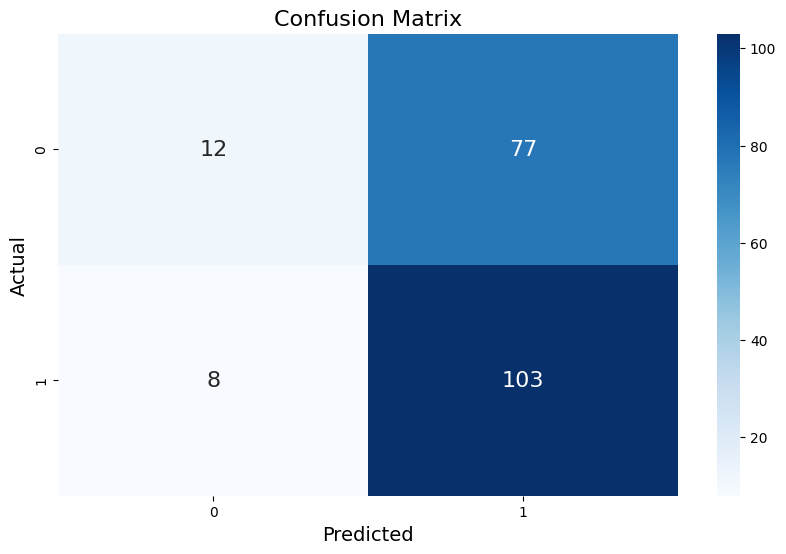

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 16})

plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

In [ ]:
# Calculating accuracy
svm_acc = accuracy_score(y_test, y_prediction_test)
# Calculating precision
svm_precision = precision_score(y_test, y_prediction_test, average="binary")
# Calculating recall
svm_recall = recall_score(y_test, y_prediction_test, average="binary")
# Calculating ROC-AUC
svm_rocauc = roc_auc_score(y_test, y_prediction_test)

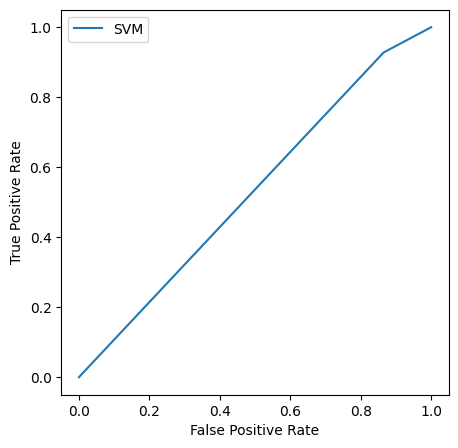

In [ ]:
 # Plotting ROC-AUC
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_prediction_test)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle="-", label="SVM" % auc_svm)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [ ]:
#Validation of SVM

svm_y_pred_unseen = SVM_Mikita.predict(x_unseen)
svm_accuracy_unseen = accuracy_score(y_unseen, svm_y_pred_unseen)
svm_precision_unseen = precision_score(y_unseen, svm_y_pred_unseen, average="binary")
svm_recall_unseen = recall_score(y_unseen, svm_y_pred_unseen, average="binary")
svm_rocauc_unseen = roc_auc_score(y_unseen, svm_y_pred_unseen)

In [ ]:
# SVM Metrics

print("Metrics: ")
print(f"SVM Accuracy: {svm_acc}")
print(f"SVM Precision: {svm_precision}")
print(f"SVM Recall: {svm_recall}")
print(f"SVM ROC-AUC: {svm_rocauc}")

# SVM Validation

print("\nValidation:")
print(f"SVM Validation Accuracy: {svm_accuracy_unseen}")
print(f"SVM Validation Precision: {svm_precision_unseen}")
print(f"SVM Validation Recall: {svm_recall_unseen}")
print(f"SVM Validation ROC-AUC: {svm_rocauc_unseen}")

Metrics: 
SVM Accuracy: 0.575
SVM Precision: 0.5722222222222222
SVM Recall: 0.9279279279279279
SVM ROC-AUC: 0.5313796943010426

Validation:
SVM Validation Accuracy: 0.52
SVM Validation Precision: 0.5340909090909091
SVM Validation Recall: 0.8703703703703703
SVM Validation ROC-AUC: 0.48953301127214177


#**NAIVE BAYES** 👇⭐

In [ ]:
# Call Naive Bayes (GaussianNB)
NB_Mikita = GaussianNB()
NB_Mikita.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_prediction_NB = NB_Mikita.predict(x_test)

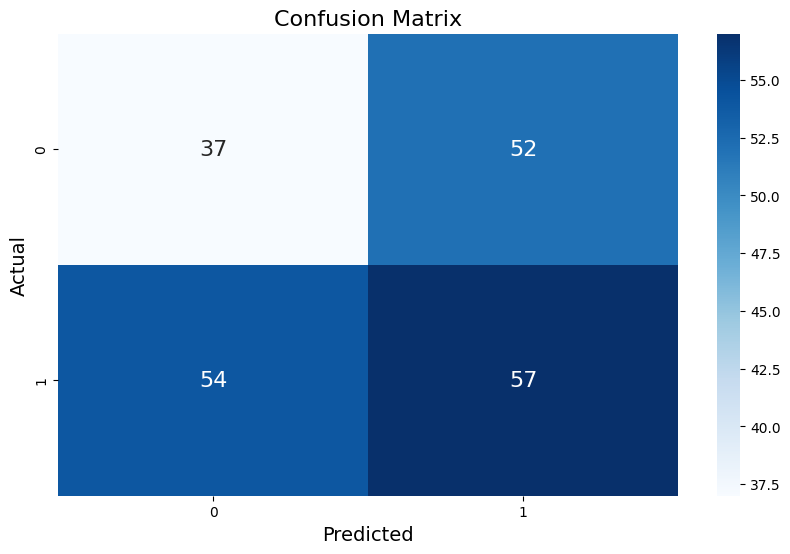

In [ ]:
matrix = confusion_matrix(y_test, y_prediction_NB)
plt.figure(figsize=(10, 6))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 16})

plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

In [ ]:
# Calculating Accuracy
NB_acc = accuracy_score(y_test, y_prediction_NB)
# Calculating Precision
NB_precision = precision_score(y_test, y_prediction_NB, average="binary")
# Calculating Recall
NB_recall = recall_score(y_test, y_prediction_NB, average="binary")
# Calculate ROC-AUC
NB_rocauc = roc_auc_score(y_test, y_prediction_NB)

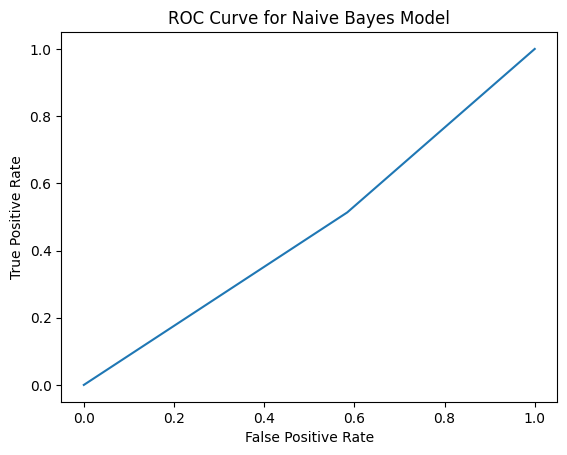

In [ ]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prediction_NB)
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Model')
plt.show()

In [ ]:
# Validating the Naive Bayes
NB_y_pred_unseen = NB_Mikita.predict(x_unseen)
NB_accuracy_unseen = accuracy_score(y_unseen, NB_y_pred_unseen)
NB_precision_unseen = precision_score(y_unseen, NB_y_pred_unseen, average="binary")
NB_recall_unseen = recall_score(y_unseen, NB_y_pred_unseen, average="binary")
NB_rocauc_unseen = roc_auc_score(y_unseen, NB_y_pred_unseen)

In [ ]:
# NB Metrics

print("Metrics: ")
print(f"NB Accuracy: {NB_acc}")
print(f"NB Precision: {NB_precision}")
print(f"NB Recall: {NB_recall}")
print(f"NB ROC-AUC: {NB_rocauc}")

# NB Validation

print("\nValidation:")
print(f"NB Validation Accuracy: {NB_accuracy_unseen}")
print(f"NB Validation Precision: {NB_precision_unseen}")
print(f"NB Validation Recall: {NB_recall_unseen}")
print(f"NB Validation ROC-AUC: {NB_rocauc_unseen}")

Metrics: 
NB Accuracy: 0.47
NB Precision: 0.5229357798165137
NB Recall: 0.5135135135135135
NB ROC-AUC: 0.4646219252960826

Validation:
NB Validation Accuracy: 0.43
NB Validation Precision: 0.47368421052631576
NB Validation Recall: 0.5
NB Validation ROC-AUC: 0.42391304347826086


#**RANDOM FOREST** 👇⭐

In [ ]:
# Call Random Forest (GaussianNB)
RF_Mikita = RandomForestClassifier()
RF_Mikita.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_prediction_RF = RF_Mikita.predict(x_test)

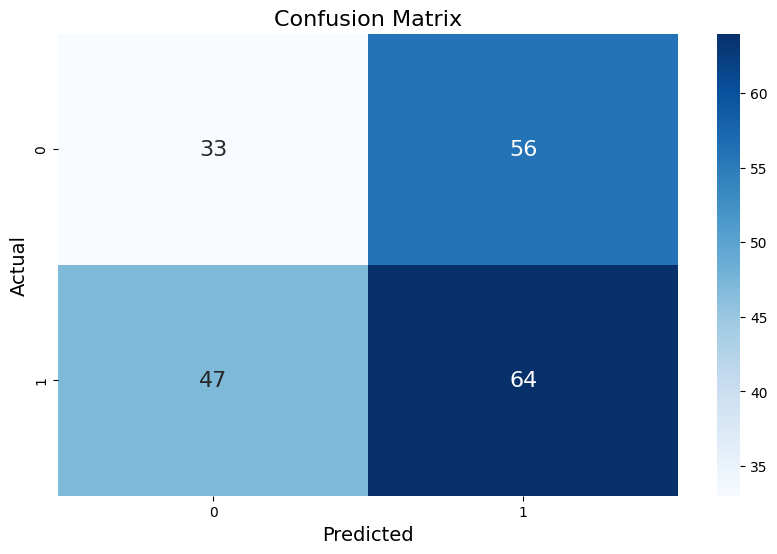

In [ ]:
matrix = confusion_matrix(y_test, y_prediction_RF)
plt.figure(figsize=(10, 6))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 16})

plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

In [ ]:
# Calculating Accuracy
RF_acc = accuracy_score(y_test, y_prediction_RF)
# Calculating Precision
RF_precision = precision_score(y_test, y_prediction_RF, average="binary")
# Calculating Recall
RF_recall = recall_score(y_test, y_prediction_RF, average="binary")
# Calculate ROC-AUC
RF_rocauc = roc_auc_score(y_test, y_prediction_RF)

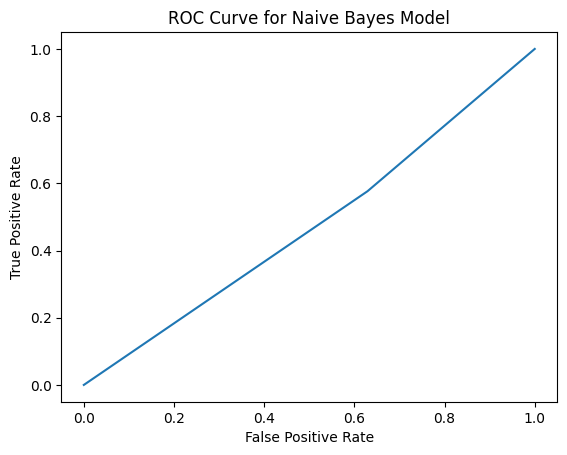

In [ ]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prediction_RF)
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Model')
plt.show()

In [ ]:
# Validating the Random Forest
RF_y_pred_unseen = RF_Mikita.predict(x_unseen)
RF_accuracy_unseen = accuracy_score(y_unseen, RF_y_pred_unseen)
RF_precision_unseen = precision_score(y_unseen, RF_y_pred_unseen, average="binary")
RF_recall_unseen = recall_score(y_unseen, RF_y_pred_unseen, average="binary")
RF_rocauc_unseen = roc_auc_score(y_unseen, RF_y_pred_unseen)

In [ ]:
# RF Metrics

print("Metrics: ")
print(f"RF Accuracy: {RF_acc}")
print(f"RF Precision: {RF_precision}")
print(f"RF Recall: {RF_recall}")
print(f"RF ROC-AUC: {RF_rocauc}")

# RF Validation

print("\nValidation:")
print(f"RF Validation Accuracy: {RF_accuracy_unseen}")
print(f"RF Validation Precision: {RF_precision_unseen}")
print(f"RF Validation Recall: {RF_recall_unseen}")
print(f"RF Validation ROC-AUC: {RF_rocauc_unseen}")

Metrics: 
RF Accuracy: 0.485
RF Precision: 0.5333333333333333
RF Recall: 0.5765765765765766
RF ROC-AUC: 0.47368154671525453

Validation:
RF Validation Accuracy: 0.52
RF Validation Precision: 0.5555555555555556
RF Validation Recall: 0.5555555555555556
RF Validation ROC-AUC: 0.5169082125603865
